In [4]:
# importing the Dataset
import pandas as pd

messages = pd.read_csv('/content/SMSSpamCollection.txt', sep='\t',
                           names=["label", "message"])



In [3]:
#Data cleaning and preprocessing

In [5]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords

In [7]:
from nltk.stem.porter import PorterStemmer

In [8]:
ps = PorterStemmer()

In [9]:
corpus = []

In [10]:
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [11]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [12]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [14]:
spam_detect_model.score(X_test,y_test)

0.9856502242152466

In [15]:
y_pred=spam_detect_model.predict(X_test)

In [16]:
y_pred

array([False,  True, False, ..., False,  True, False])

In [17]:
y_test

array([False,  True, False, ..., False,  True, False])

In [18]:
import numpy as np

In [19]:
y_pred=np.array(y_pred).astype(int)

In [20]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [21]:
y_test=np.array(y_test).astype(int)

In [22]:
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [24]:
cm

array([[946,   9],
       [  7, 153]])

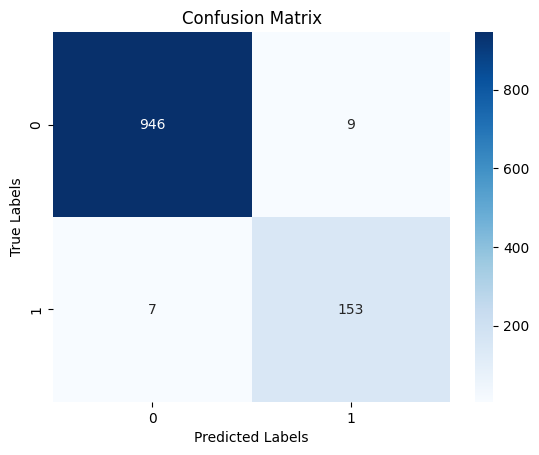

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)

In [34]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.96      0.95       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

